---
# Python Course - Class 3:
# Data visualization


---
# Plots and Graphs

## - Matplotlib (https://matplotlib.org/)

### Basic plotting

&rarr; 1-D `x` vs `y` plot

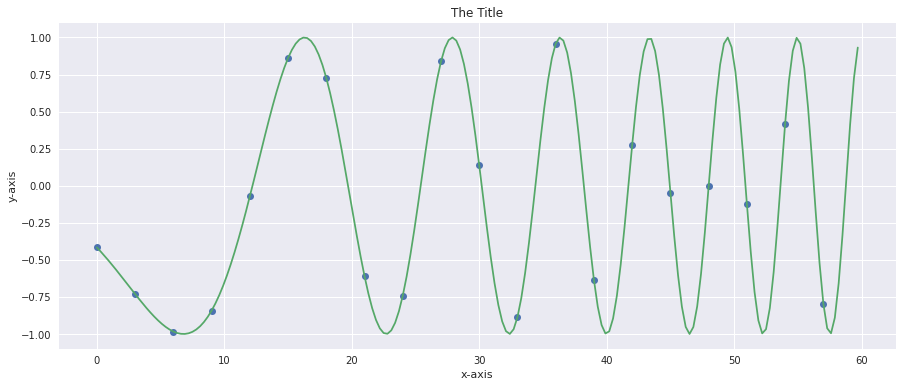

In [55]:
import matplotlib.pyplot as mplt
import numpy as np

# generate some data
x = np.arange(0, 60, 3)
x_fine = np.arange(0, 60, 0.3)

# create the model
def model(x):
    '''
    The Model
    '''
    return np.cos ( x / 10 + 2 + (x / 10 )**2 ) 

# define figure size
mplt.figure(figsize = (15,6))

# plot the data points
mplt.plot(x,model(x),'o',label = 'data')

# add a line
mplt.plot(x_fine,model(x_fine),'-',label = 'model')

# axes labels
mplt.xlabel('x-axis')
mplt.ylabel('y-axis')

# plot title
mplt.title('The Title')

# plot legend
#mplt.legend()

mplt.show()

#### &rarr; 2-D image plot

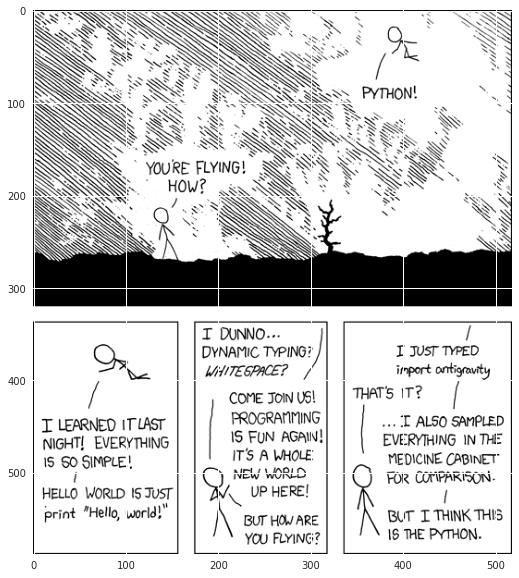

In [56]:
from skimage import io

image_url = "https://imgs.xkcd.com/comics/python.png"
data = io.imread( image_url )

mplt.figure(figsize = (15,10))
mplt.imshow(data, cmap='gray')
mplt.show()

#### &rarr; bar plot

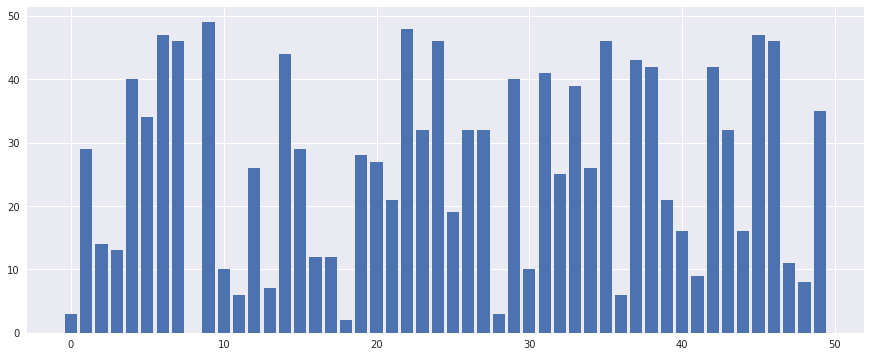

In [57]:
from numpy.random import choice

# generate some data
data_pool = np.arange(0, 50)
N = 50                          # number of selections from the data_pool
indexes = np.arange(0, N)
data = choice(data_pool,size = N, replace=True)



# creating the plot
mplt.figure(figsize = (15,6))
mplt.bar(indexes,data)
mplt.show()

### Advanced plotting

#### The figure 
- this is the page or canvas where our plots go. 
 
` matplotlib.pyplot.figure(num=name/number, figsize= (width,height), dpi = int, facecolor = color, **kwargs)`
- `num` - the name or number of the figure, can be _string_ or _integer_
- `figsize` - the dimensions of the figure in inches
- `dpi` - the resolution of the figure in dots-per-inch (_dpi_)
- `facecolor` - the background color

#### The axes 
- these are the axes of our plot, can be single or multiple, or fully customized. 
- We can have multiple axes on a figure.

`matplotlib.pyplot.add_axes( [left, bottom, width, height] , projection=projection, **kwargs)`  
- `[left, bottom, width, height]`  The dimensions of the new axes. All quantities are in fractions of figure width and height.
- `projection` - The projection type of the Axes, which can be any of `None, 'aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear'`. The default (`None`) corresponds to the 'rectilinear' projection.

#### The plots 
- these are the representation of our data. 
- We can have multiple plots on an axis.

`matplotlib.pyplot.plot(x, y,marker = marker, linestyle = linestyle, **kwargs)`
- `x` - the x-axis values for the data. If ommited, it will revert to the index of `y`
- `y` - the y-axis values for the data. It is the only required parameter.
- `marker` - the symbol for the plotted data. Possible markers are given by: `import matplotlib; matplotlib.markers.MarkerStyle.markers.keys()`)
- `linestyle` - the line that links the markers. Possible markers are given by: `import matplotlib; matplotlib.lines.lineStyles.keys()`)
- `ticks` - the markers on the axes, and their label
- `handles` -
- `labels` - the text label for the axes themselves
- `title` - the title for the considered axis

#### Text/annotations
- text/annotations can be added to the axes with:

`matplotlib.pyplot.text(x, y, s, **kwargs)`
- `x` - the x-axis position for the text, in data coordinates.
- `y` - the y-axis position for the text, in data coordinates.
- `s` - the string to be printed.

`matplotlib.pyplot.annotate(s, xy, yxtext=yxtext **kwargs)`
- `s` - the string to be printed.
- `xy` (float, float) - a tuple with the x- and y-axes position for the origin of the text box, in data coordinates.
- `yxtext` (float, float) - a tuple with the x- and y-axes position for the text, in data coordinates.

#### kwargs - some useful common arguments.
- `color` - the color of the object to be printed/plotted (text, plot, axis, etc).
- `fontsize` - defines the size of the font to be used (common to `text` and `annotate`).
- `ha`/`horizontalalignment` - defines the horizontal alignment of the text (common to `text` and `annotate`).
- `va`/`verticalalignment` - defines the vertical alignment of the text (common to `text` and `annotate`).

#### &rarr; Example: Simple 'hammer' projection plot


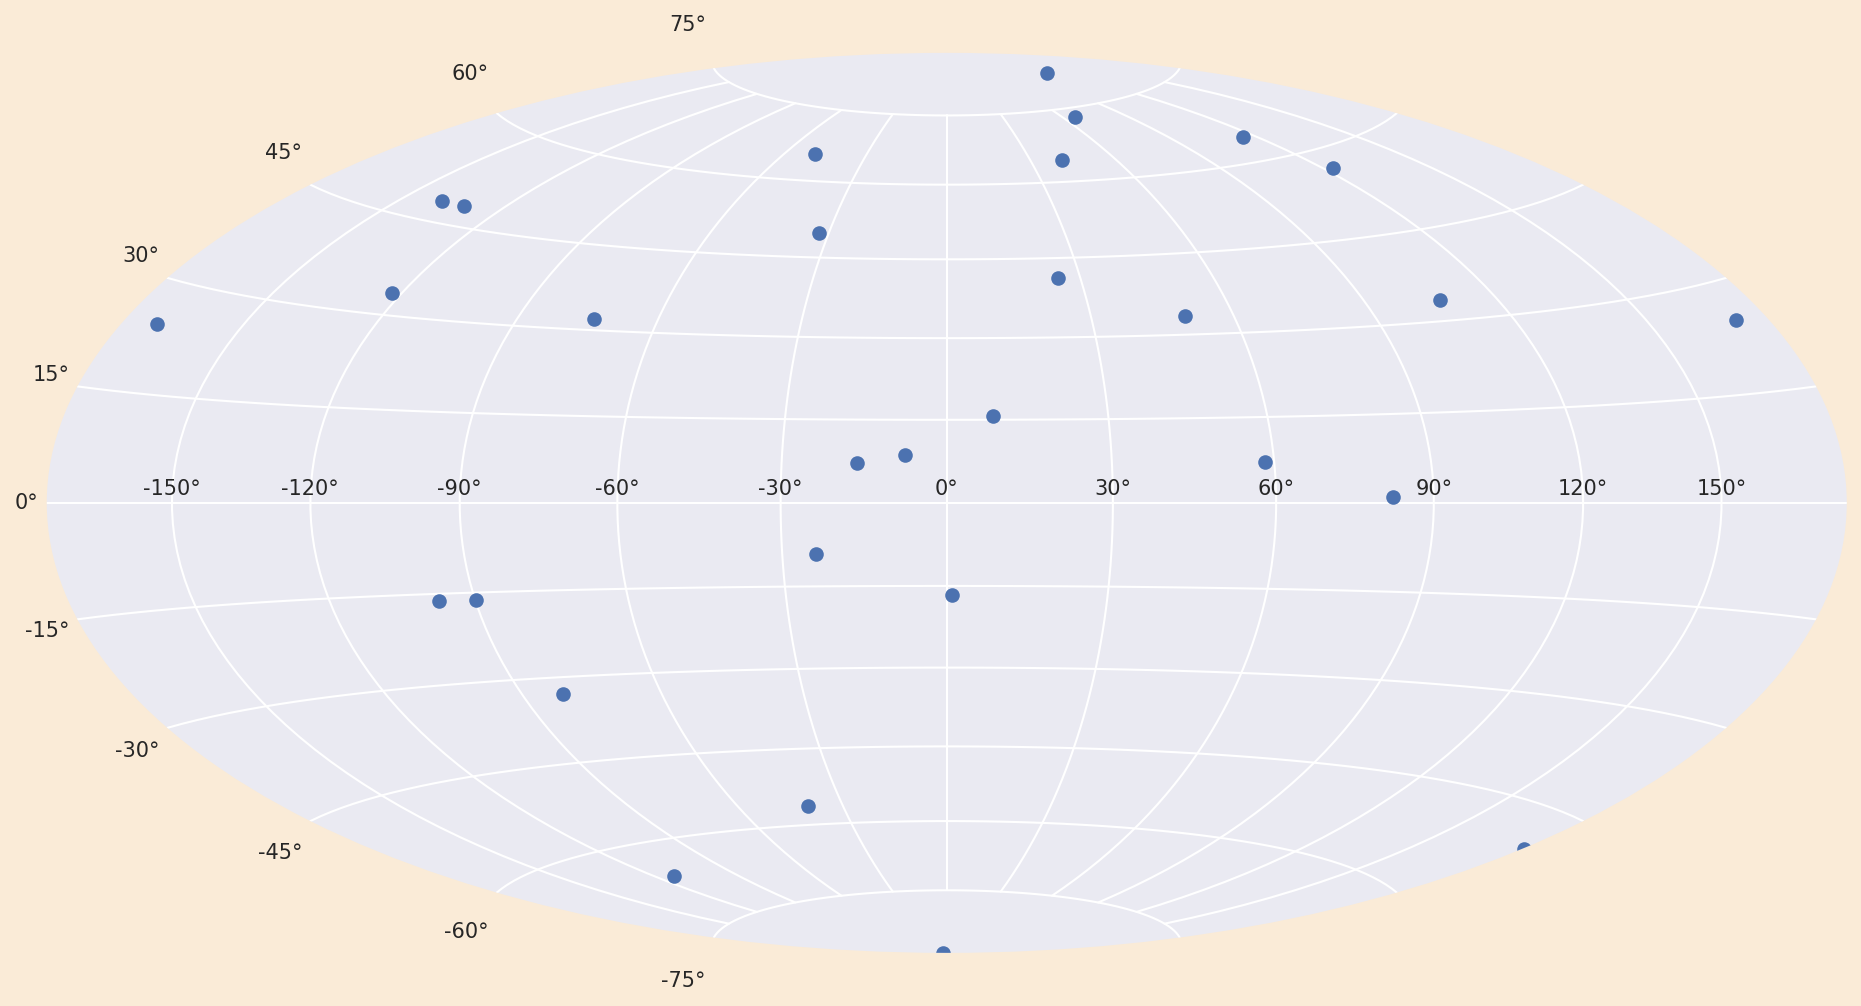

In [58]:
# creating the figure ("the page")
fig = mplt.figure(num = "test", figsize=(15,6), dpi = 150, facecolor = "antiquewhite")

# creating the axis
ax = fig.add_axes([0.0,0.0, 1., 1.],projection = 'hammer')
ax.plot(data,'o')

#### &rarr; Example: Plot with an inset plot

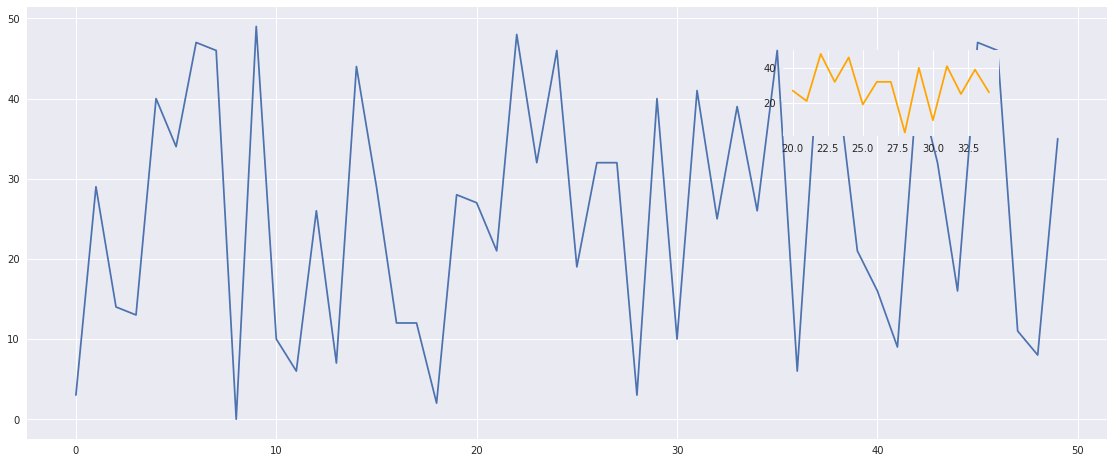

In [59]:
# creating the figure 
fig = mplt.figure(figsize=(15,6))

# creating an axis with main data
ax1 = fig.add_axes([0.0,0.0, 1., 1.])
ax1.plot(indexes,data)

# creating an inset plot
ax2 = fig.add_axes([0.7, 0.7, .2, .2])
ax2.plot(indexes[-30:-15],data[-30:-15],'orange')

#### &rarr; Example: Multiple plots on same figure

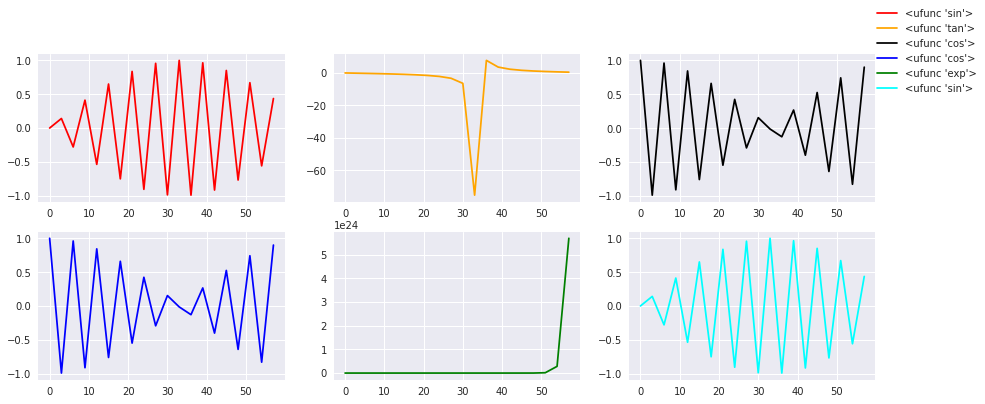

In [60]:
# creating the figure and axes
fig, axes = mplt.subplots(nrows=2, ncols=3, figsize = (15,6))

# plotting data
funcs = (np.sin, np.cos, np.exp, np.tan, np.cos, np.sin)
colors = ['red', 'blue','green','orange','black','cyan']

for index,func in enumerate(funcs):
    jj = int(index // 2)
    ii = index - 3 * jj
    axes[ii, jj].plot(x, func(x),label=str(func), color = colors[index])

fig.legend()

#### &rarr; Example: Multiple plots with a shared x-axis

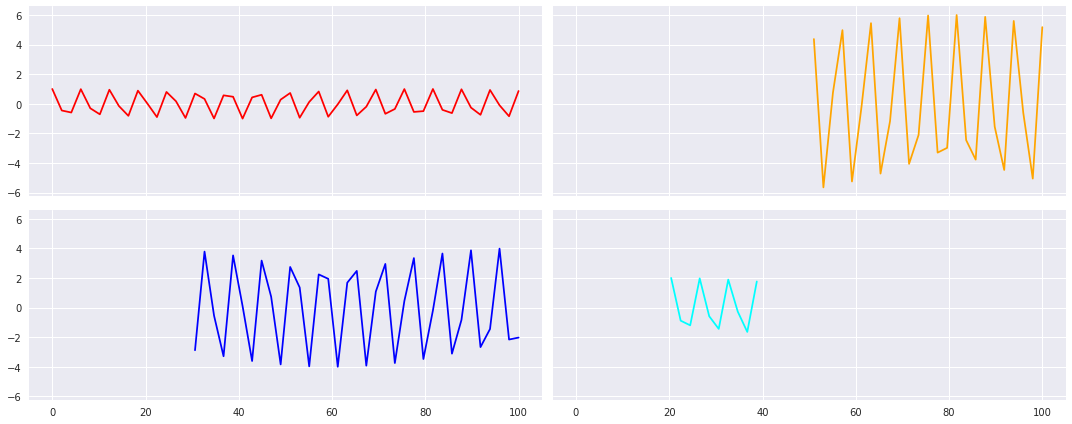

In [61]:
# creating the figure and axes
fig, axes = mplt.subplots(nrows=2, ncols=2, figsize = (15,6), sharex=True, sharey=True)

# create some data
x = np.linspace(0,100)

# plot, plot, plot, plot
axes[0,0].plot(x , np.cos(x), color = 'red')
axes[1,0].plot(x[15:60] , 4 * np.sin(x[15:60]),color = 'blue')
axes[0,1].plot(x[25:75] , 6*np.cos(x[25:75]), color = 'orange')
axes[1,1].plot(x[10:20] , 2*np.sin(x[10:20]),color = 'cyan')

# adjust spacing
fig.tight_layout()

#### &rarr; Example: Multiple plots which share different axes

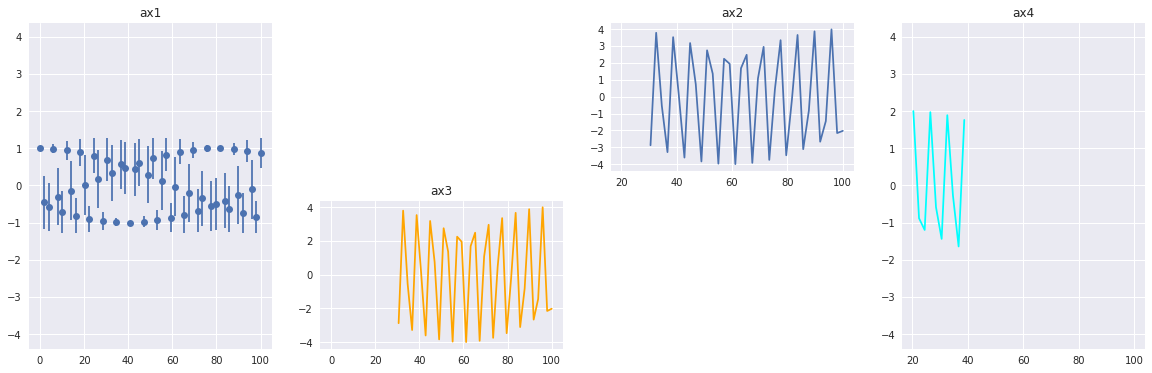

In [62]:
# creating the figure
fig = mplt.figure(figsize=(20,6))

mplt.style.use('seaborn')

# create the axes
ax1 = fig.add_subplot(141, title = 'ax1') 
ax2 = fig.add_subplot(243, sharey=ax1, title = 'ax2')
ax3 = fig.add_subplot(246, sharex=ax1, title = 'ax3')
ax4 = fig.add_subplot(144, sharex=ax2, sharey=ax2, title = 'ax4')


# add data
ax1.errorbar(x , np.cos(x),0.8 * np.sin(x), marker = 'o',linestyle = '' )
#ax1.plot(x , 2 * np.cos(x), marker = 'o',linestyle = '')

ax2.plot(x[15:60] , 4 * np.sin(x[15:60]))
ax3.plot(x[15:60] , 4 * np.sin(x[15:60]), color = 'orange')
ax4.plot(x[10:20] , 2*np.sin(x[10:20]),color = 'cyan')

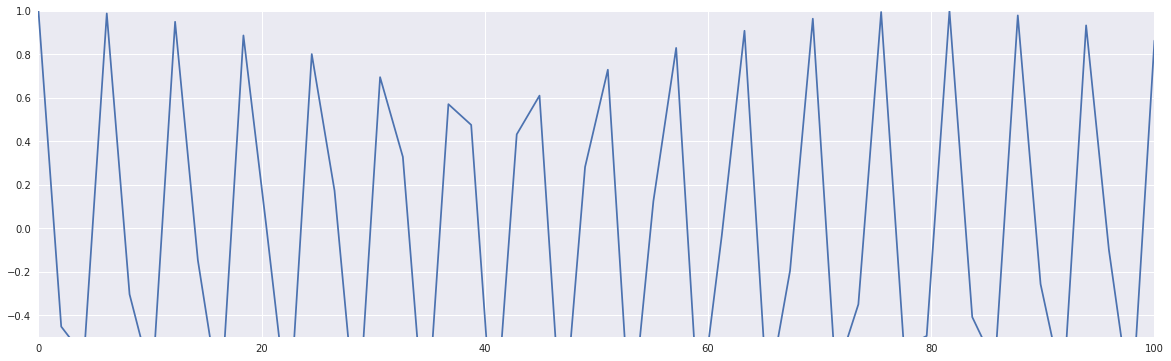

In [63]:

fig = mplt.figure(figsize=(20,6))
ax10 = fig.add_subplot(111)

ax10.set_xlim([min(x),max(x)])

ax10.set_ylim([min(np.cos(x))/2,max(np.cos(x))])

ax10.plot(x , np.cos(x))




<img align="left" width="500" src="./know_more_banner.png">  <br /><br />

https://matplotlib.org/stable/index.html


https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html


## - Seaborn

"Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures."
(from: https://seaborn.pydata.org/introduction.html)

In brief, the idea behind Seaborn is for people to focus on the data analysis and not on how to create the plots.


<img align="left" width="500" src="./know_more_banner.png">  <br /><br />

https://seaborn.pydata.org/

---
# On the shell

## Writting data on the shell

### - the `print()` function

In [64]:
# printing a simple sentence
print ('This is a string')

This is a string


In [65]:
# printing a string
string = "This is a string"
print (string)

This is a string


In [66]:
# printing multiple strings
string1 = "these"
string2 = "are"
string3 = "four"
string4 = "strings"

print (string1,string3,string2,string4)

print (string1 + string2 + string3 + string4)

print (string1 + string2 , string3 , string4)

these four are strings
thesearefourstrings
theseare four strings


In [67]:
# printing a list of strings
strings = ["this", "is", "a", "list", "of", "strings"]
print (strings)

# expanding the list
print (*strings)

['this', 'is', 'a', 'list', 'of', 'strings']
this is a list of strings


In [68]:
# string concatenation
string1 = "these"
string2 = "are"
string3 = "four"
string4 = "strings"

concatenated_string = string1 + string2 + string3 + string4

print(concatenated_string)

thesearefourstrings


In [69]:
import numpy as np
# printing a dictionary 
dict_strings = {'a':10, 'b':25, 'c':[25,13,14], 'd': np.arange(50), 'e': list(range(10))}

print (dict_strings)

{'a': 10, 'b': 25, 'c': [25, 13, 14], 'd': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 'e': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}


### - the `pprint()` function - Pretty-Printing Data Structures

In [70]:
from pprint import pprint

pprint (dict_strings)

{'a': 10,
 'b': 25,
 'c': [25, 13, 14],
 'd': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 'e': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}


### - the `format()` function - string formatting

In [71]:
# inserting list items in a string
fruits = ['apples','bananas','oranges']

# misaligned 
for fruit in fruits:
    print ('{} are fruits'.format(fruit))

apples are fruits
bananas are fruits
oranges are fruits


In [72]:
# aligned  
for fruit in fruits:
    print ('{:8s} are fruits'.format(fruit))

apples   are fruits
bananas  are fruits
oranges  are fruits


In [73]:
# multiple insertions
string = "there are {}, {} and {} in a basket"

print (string.format(fruits[0],fruits[1],fruits[2]))
print (string.format(*fruits))

there are apples, bananas and oranges in a basket
there are apples, bananas and oranges in a basket


In [74]:
# multiple insertions from dict
dict_fruits = [{'fruit':'bananas','weight':1.145368,'number':5}, {'fruit':'orangess','weight':12.2541325,'number':120},{'fruit':'apples','weight':0.5998,'number':3}]

string = '{number:3.0f} {fruit:8s} weight {weight:3.1f} kg'

for fruit in dict_fruits:
    print(string.format(**fruit))


  5 bananas  weight 1.1 kg
120 orangess weight 12.3 kg
  3 apples   weight 0.6 kg


In [75]:
# alignement
string = '{number:<5.0f}|{fruit:^10s}|{weight:>6.1f} kg'

for fruit in dict_fruits:
    print(string.format(**fruit))

5    | bananas  |   1.1 kg
120  | orangess |  12.3 kg
3    |  apples  |   0.6 kg


### - tabular data

In [76]:
import numpy as np
from tabulate import tabulate

# create data
data_A = np.arange(0,21).reshape((7,3))
headers_A = ["col 1", "col 2", "col 3"]

# tabulate data
table_A1 = tabulate(data_A)
table_A2 = tabulate(data_A, headers_A, tablefmt="fancy_grid")

# print tables
print(table_A1,'\n')
print(table_A2)

--  --  --
 0   1   2
 3   4   5
 6   7   8
 9  10  11
12  13  14
15  16  17
18  19  20
--  --  -- 

╒═════════╤═════════╤═════════╕
│   col 1 │   col 2 │   col 3 │
╞═════════╪═════════╪═════════╡
│       0 │       1 │       2 │
├─────────┼─────────┼─────────┤
│       3 │       4 │       5 │
├─────────┼─────────┼─────────┤
│       6 │       7 │       8 │
├─────────┼─────────┼─────────┤
│       9 │      10 │      11 │
├─────────┼─────────┼─────────┤
│      12 │      13 │      14 │
├─────────┼─────────┼─────────┤
│      15 │      16 │      17 │
├─────────┼─────────┼─────────┤
│      18 │      19 │      20 │
╘═════════╧═════════╧═════════╛


### - progress bars

In [77]:
import time
from tqdm import tqdm
for i in tqdm(range(100)):
    time.sleep(0.1)

100%|██████████| 100/100 [00:10<00:00,  9.86it/s]


## - easy python logs with the `logging` library

### - `logging` to the console

In [78]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.debug('BUUUGGSS!!!!')
logger.error('You broke me!!')
logger.warning('Achtung!')  # will print a message to the console
logger.info('information')  # will not print anything

### - `logging` to a file

In [79]:
# create logger instance
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

# create file handler which logs even debug messages
fh = logging.FileHandler('./example.log', mode='w')
fh.setLevel(logging.DEBUG)
logger.addHandler(fh)

# log messages
logger.debug('BUUUGGSS!!!!')
logger.warning('Achtung!')
logger.info('information')
logger.error('You broke me!!')

with open('./example.log','r') as f:
    filedata = f.readlines()
    pprint (filedata)

0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

<img align="left" width="500" src="./know_more_banner.png">  <br />  <br />  


https://docs.python.org/3/howto/logging.html

--- 


<img align="left" width="500" src="./know_more_banner.png">  <br />  <br />  

email us at <Jorge.Martins@astro.up.pt> or <Andre.Silva@astro.up.pt>